In [1]:
import yfinance as yf
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [11]:
#Extracción de precios determinados en un rango determinado

apple=yf.download(tickers="aapl", start= "2021-04-06", end="2023-04-06", rounding=True)
apple

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-04-06,123.30,124.20,122.75,123.59,80171300
2021-04-07,124.95,124.97,122.26,122.93,83466700
2021-04-08,127.36,127.39,125.56,125.98,88844600
2021-04-09,129.94,129.97,126.49,126.81,106686700
2021-04-12,128.22,129.79,127.62,129.47,91420000
...,...,...,...,...,...
2023-03-30,160.53,160.64,159.45,159.71,49501700
2023-03-31,163.04,163.14,160.08,160.61,68749800


In [13]:
apple=apple["Close"]
apple

Ticker,AAPL
Date,
2021-04-06,123.30
2021-04-07,124.95
2021-04-08,127.36
2021-04-09,129.94
2021-04-12,128.22
...,...
2023-03-30,160.53
2023-03-31,163.04
2023-04-03,164.30


In [15]:
apple.index=pd.to_datetime(apple.index)
len_train= int(len(apple)*.8)
len_train

404

In [17]:
len_test=int(len(apple)*.2)
len_test

101

In [99]:
# definición grupo de entrenamiento y prueba
train= apple[0:len_train]
train

Ticker,AAPL
Date,
2021-04-06,123.30
2021-04-07,124.95
2021-04-08,127.36
2021-04-09,129.94
2021-04-12,128.22
...,...
2022-11-02,142.94
2022-11-03,136.88
2022-11-04,136.61


In [101]:
test= apple[len_train:]
test

Ticker,AAPL
Date,
2022-11-09,133.15
2022-11-10,144.99
2022-11-11,147.79
2022-11-14,146.38
2022-11-15,148.12
...,...
2023-03-30,160.53
2023-03-31,163.04
2023-04-03,164.30


[1.         0.97625518 0.95361668 0.93385822 0.9167476  0.8992113
 0.87972318 0.85897118 0.83915285 0.82181334 0.80537052 0.79066949
 0.76990828 0.74988327 0.73089309 0.71192185 0.6950503  0.67682183
 0.6592751  0.64038211 0.61935518 0.59843965 0.57731541 0.55921025
 0.54064861 0.51825624 0.4957388 ]


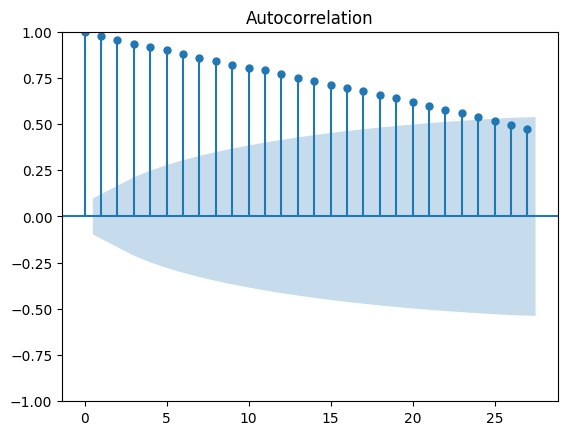

In [25]:
# Gráfica de autocorrelación

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

acf_array= acf(train)
print(acf_array)

# Gráfico con nivel de confianza del 95%
plot_acf(train, alpha=.05)
plt.show()

In [103]:
from statsmodels.tsa.arima.model import ARIMA
#Fit an AR(1) to the first simulated data

mod= ARIMA(train, order=(1,0,0))
res= mod.fit()

C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [105]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  404
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -991.782
Date:                Thu, 12 Jun 2025   AIC                           1989.564
Time:                        20:04:51   BIC                           2001.569
Sample:                             0   HQIC                          1994.316
                                - 404                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.8029      6.540     22.140      0.000     131.984     157.622
ar.L1          0.9825      0.010    103.263      0.000       0.964       1.001
sigma2         7.8744      0.447     17.607      0.0

In [107]:
# predicciones 
predicciones= res.forecast(len(test))
predicciones

C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


404    137.844024
405    137.965876
406    138.085594
407    138.203216
408    138.318779
          ...    
500    143.526384
501    143.548736
502    143.570697
503    143.592273
504    143.613472
Name: predicted_mean, Length: 101, dtype: float64

In [109]:
# intervalos con el 95%
# valor más probable predicción, pero con límites superiores e inferiores
conf= res.get_forecast(len(test)).conf_int(alpha=.05)
conf

C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower AAPL,upper AAPL
404,132.344096,143.343952
405,130.255600,145.676151
406,128.724298,147.446890
407,127.486829,148.919604
408,126.440076,150.197482
...,...,...
500,114.490529,172.562239
501,114.495966,172.601506
502,114.501609,172.639785
503,114.507443,172.677104


In [111]:
# como sacar el reporte completo con predicción (mean), desvaición y límites inferiores y superiores
fcast_res=res.get_forecast(len(test))
print(fcast_res.summary_frame(alpha=.05))

AAPL        mean    mean_se  mean_ci_lower  mean_ci_upper
404   137.844024   2.806137     132.344096     143.343952
405   137.965876   3.933886     130.255600     145.676151
406   138.085594   4.776259     128.724298     147.446890
407   138.203216   5.467645     127.486829     148.919604
408   138.318779   6.060674     126.440076     150.197482
..           ...        ...            ...            ...
500   143.526384  14.814484     114.490529     172.562239
501   143.548736  14.823114     114.495966     172.601506
502   143.570697  14.831440     114.501609     172.639785
503   143.592273  14.839472     114.507443     172.677104
504   143.613472  14.847221     114.513453     172.713491

[101 rows x 4 columns]


C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [131]:
test=pd.DataFrame(test)
predicciones= pd.DataFrame(predicciones)
test=test.reset_index()
predicciones=predicciones.reset_index()

In [133]:
test= test[["Date","AAPL"]]
test

Ticker,Date,AAPL
0,2022-11-09,133.15
1,2022-11-10,144.99
2,2022-11-11,147.79
3,2022-11-14,146.38
4,2022-11-15,148.12
...,...,...
96,2023-03-30,160.53
97,2023-03-31,163.04
98,2023-04-03,164.30
99,2023-04-04,163.76


In [117]:
predicciones

,index,predicted_mean
0,404,137.844024
1,405,137.965876
2,406,138.085594
3,407,138.203216
4,408,138.318779
...,...,...
96,500,143.526384
97,501,143.548736
98,502,143.570697
99,503,143.592273


In [119]:
import numpy as np

acumulador1=0
acumulador2=0

for contador in range (0,101):
    acumulador1= acumulador1+(test.iloc[contador][1]-predicciones.iloc[contador][1])**2
    acumulador2= acumulador2+np.abs((test.iloc[contador][1]-predicciones.iloc[contador][1])/test.iloc[contador][1])

mse=acumulador1/101
rmse=np.round(np.sqrt(mse),2)
mape=np.round((acumulador2/101)*100,2)
print("RMSE=",rmse, "MAPE=", mape, "%")

# error en unidades y en porcentaje

RMSE= 9.59 MAPE= 3.0 %


In [121]:
# Pronosticar 5 días posteriores

predicciones= res.forecast(len(test)+5)
predicciones.tail(5)

C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


505    143.634299
506    143.654762
507    143.674866
508    143.694619
509    143.714025
Name: predicted_mean, dtype: float64

In [123]:
conf= res.get_forecast(len(test)+5).conf_int(alpha=.05)
conf.tail(5)

C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower AAPL,upper AAPL
505,114.519627,172.748972
506,114.525952,172.783572
507,114.532416,172.817317
508,114.539007,172.850230
509,114.545715,172.882335


In [135]:
train=pd.DataFrame(train)
lista=test["Date"]
lista=pd.DataFrame(lista)
test.index=test["Date"]
test.drop(columns=["Date"],inplace=True)
test

Ticker,AAPL
Date,
2022-11-09,133.15
2022-11-10,144.99
2022-11-11,147.79
2022-11-14,146.38
2022-11-15,148.12
...,...
2023-03-30,160.53
2023-03-31,163.04
2023-04-03,164.30


In [137]:
lista

,Date
0,2022-11-09
1,2022-11-10
2,2022-11-11
3,2022-11-14
4,2022-11-15
...,...
96,2023-03-30
97,2023-03-31
98,2023-04-03
99,2023-04-04


In [73]:
k=5
lista2=[]
for day in range(1,6):
    fecha=((pd.to_datetime("2023-04-05")+ pd.offsets.BDay(day)).date())
    lista2.append(fecha)
lista2= pd.DataFrame(lista2, columns=["Date"])
lista2["Date"]=pd.to_datetime(lista2["Date"])
lista2

,Date
0,2023-04-06
1,2023-04-07
2,2023-04-10
3,2023-04-11
4,2023-04-12


In [149]:
fechas=pd.concat([lista,lista2], axis=0)

,Date
0,2022-11-09
1,2022-11-10
2,2022-11-11
3,2022-11-14
4,2022-11-15
...,...
0,2023-04-06
1,2023-04-07
2,2023-04-10
3,2023-04-11


In [151]:
fechas=fechas.reset_index()
fechas

,index,Date
0,0,2022-11-09
1,1,2022-11-10
2,2,2022-11-11
3,3,2022-11-14
4,4,2022-11-15
...,...,...
101,0,2023-04-06
102,1,2023-04-07
103,2,2023-04-10
104,3,2023-04-11


In [155]:
fechas.drop(columns=["index"],inplace=True)
fechas

,Date
0,2022-11-09
1,2022-11-10
2,2022-11-11
3,2022-11-14
4,2022-11-15
...,...
101,2023-04-06
102,2023-04-07
103,2023-04-10
104,2023-04-11


In [157]:
predicciones= pd.DataFrame(predicciones)
predicciones=predicciones.reset_index()
predicciones

,level_0,index,predicted_mean
0,0,404,137.844024
1,1,405,137.965876
2,2,406,138.085594
3,3,407,138.203216
4,4,408,138.318779
...,...,...,...
101,101,505,143.634299
102,102,506,143.654762
103,103,507,143.674866
104,104,508,143.694619


In [161]:
frames=[fechas["Date"],predicciones["predicted_mean"]]
result= pd.concat(frames, axis=1, join="inner")
result

,Date,predicted_mean
0,2022-11-09,137.844024
1,2022-11-10,137.965876
2,2022-11-11,138.085594
3,2022-11-14,138.203216
4,2022-11-15,138.318779
...,...,...
101,2023-04-06,143.634299
102,2023-04-07,143.654762
103,2023-04-10,143.674866
104,2023-04-11,143.694619


In [163]:
print(result.dtypes)

Date              datetime64[ns]
predicted_mean           float64
dtype: object


In [165]:
result.index=result["Date"]
result.drop(columns=["Date"],inplace=True)
result

,predicted_mean
Date,
2022-11-09,137.844024
2022-11-10,137.965876
2022-11-11,138.085594
2022-11-14,138.203216
2022-11-15,138.318779
...,...
2023-04-06,143.634299
2023-04-07,143.654762
2023-04-10,143.674866


In [167]:
conf=conf.reset_index()

In [169]:
conf.drop(columns=["index"],inplace=True)
conf

,lower AAPL,upper AAPL
0,132.344096,143.343952
1,130.255600,145.676151
2,128.724298,147.446890
3,127.486829,148.919604
4,126.440076,150.197482
...,...,...
101,114.519627,172.748972
102,114.525952,172.783572
103,114.532416,172.817317
104,114.539007,172.850230


In [171]:
frames=[fechas["Date"], conf]
intervalos= pd.concat(frames, axis=1, join="inner")
intervalos

,Date,lower AAPL,upper AAPL
0,2022-11-09,132.344096,143.343952
1,2022-11-10,130.255600,145.676151
2,2022-11-11,128.724298,147.446890
3,2022-11-14,127.486829,148.919604
4,2022-11-15,126.440076,150.197482
...,...,...,...
101,2023-04-06,114.519627,172.748972
102,2023-04-07,114.525952,172.783572
103,2023-04-10,114.532416,172.817317
104,2023-04-11,114.539007,172.850230


In [173]:
intervalos.index= intervalos["Date"]
intervalos.drop(columns=["Date"], inplace=True)
intervalos

,lower AAPL,upper AAPL
Date,,
2022-11-09,132.344096,143.343952
2022-11-10,130.255600,145.676151
2022-11-11,128.724298,147.446890
2022-11-14,127.486829,148.919604
2022-11-15,126.440076,150.197482
...,...,...
2023-04-06,114.519627,172.748972
2023-04-07,114.525952,172.783572
2023-04-10,114.532416,172.817317


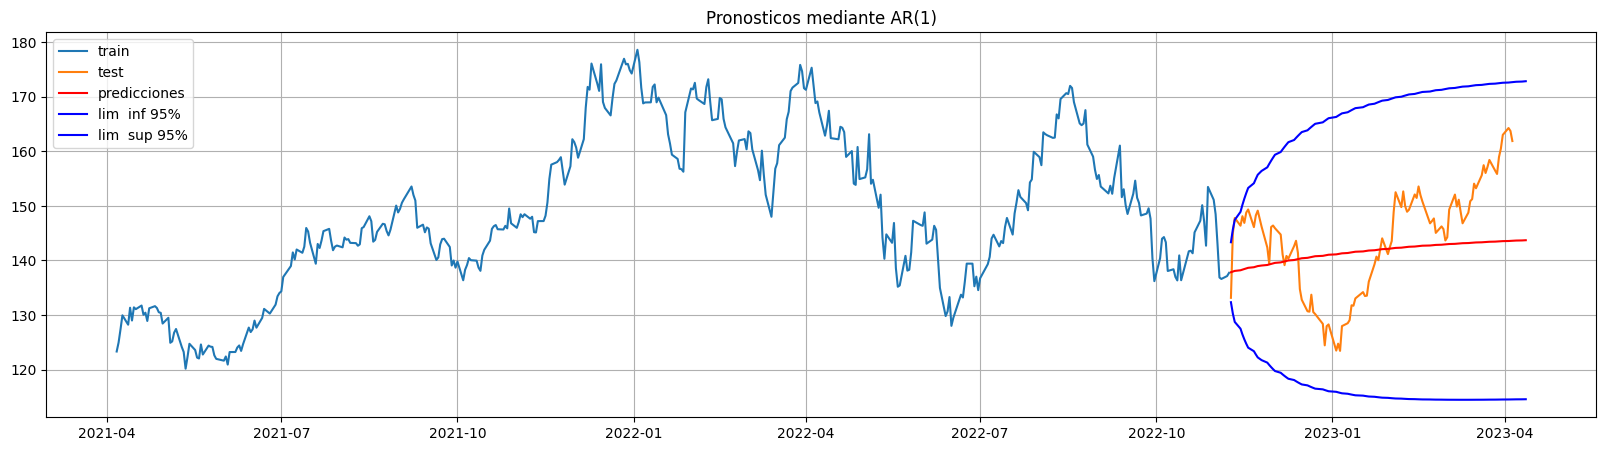

In [177]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train, label="train")
plt.plot(test, label="test")
plt.plot(result, label="predicciones", color="red")
plt.plot(intervalos["lower AAPL"], label="lim  inf 95%", color="blue")
plt.plot(intervalos["upper AAPL"], label="lim  sup 95%", color="blue")
plt.legend(loc="best")
plt.title("Pronosticos mediante AR(1)")
plt.show()

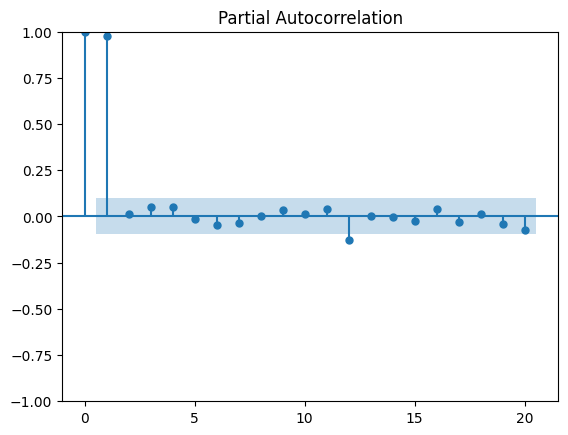

In [179]:
# Determinación del valor adecuado para p para AR(p) a partire de la función de autocorrelación parcial
# para saberlo se checa cuantos retrasos hay( barras grandes en el gráfico al inicio sin tomar el primero)
# por lo tanto es 1
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train, lags=20)
plt.show()

### Conclusión = el modelo AR(1) parece ser el más adecuado

C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequenc

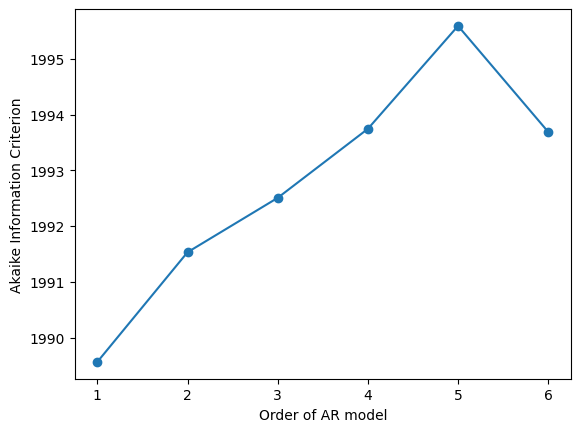

In [184]:
#Determinación del valor adecuado de p para AR(p)  a partir del criterio de  información AKAIKE
# fit de data to an AR(p)  for p = 1,2, 3,4,5,6
# np.zeros(7) es para crear un arreglos de ceros
ATC=np.zeros(7)
for p in range(7):
    mod= ARIMA(train,order=(p,0,0))
    res=mod.fit()

#SAVE ATC for AR(p)
    ATC[p]=res.aic


#plot de ATC as a function of p
plt.plot(range(1,7),ATC[1:7], marker="o")
plt.xlabel("Order of AR model")
plt.ylabel("Akaike Information Criterion")
plt.show()

# Se elige el menor valor del gráfico

C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequenc

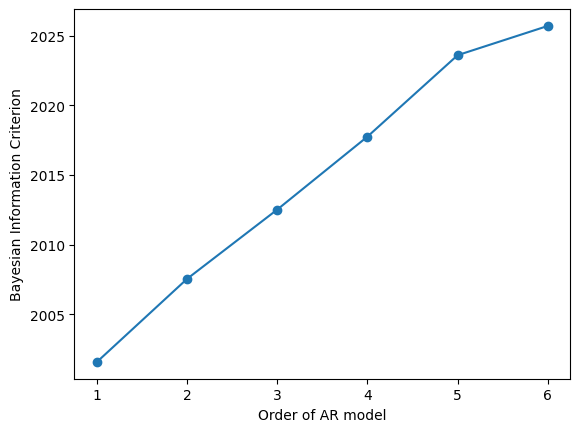

In [186]:
# BAYESIANO
BIC=np.zeros(7)
for p in range(7):
    mod= ARIMA(train,order=(p,0,0))
    res=mod.fit()

#SAVE BIC for AR(p)
    BIC[p]=res.bic


#plot de BIC as a function of p
plt.plot(range(1,7),BIC[1:7], marker="o")
plt.xlabel("Order of AR model")
plt.ylabel("Bayesian Information Criterion")
plt.show()

# Se elige el menor valor del gráfico

### conclusión: en ambos índices (bayesiano y akaike) se tiene el menor valor para p=1, por lo tanto se recomienda AR(1)